## Importing Necessary Technologies and configuring the Envoirnment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [21]:
import missingno as msno

## Data Sets used
1. per-capita-plastic-waste-vs-gdp-per-capita
2. per-capita-mismanaged-plastic-waste-vs-gdp-per-capita

## Data Analysis

In [22]:
df1 = pd.read_csv('per-capita-plastic-waste-vs-gdp-per-capita.csv')
df1.rename(
    columns={
        'GDP per capita, PPP (constant 2011 international $)': 'PPP', 
        'Total population (Gapminder, HYDE & UN)': 'Total Population',
        'Per capita plastic waste (kg/person/day)': 'PPW(kg/person/day)'
    },inplace=True)
df1.head()

,Entity,Code,Year,PPW(kg/person/day),PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [32]:
print("Percentage of Data Missing:")
print(df1.isnull().sum()/len(df1)*100)
## seems like the main column PPW is all missing
## whats the purpose of doing further analysis

Percentage of Data Missing:
Entity                 0.000000
Code                   4.181199
Year                   0.000000
PPW(kg/person/day)    99.613852
PPP                   86.698638
Total Population       2.667746
Continent             99.408321
dtype: float64


In [53]:
df1=df1.drop('Continent',axis=1)

<AxesSubplot:>

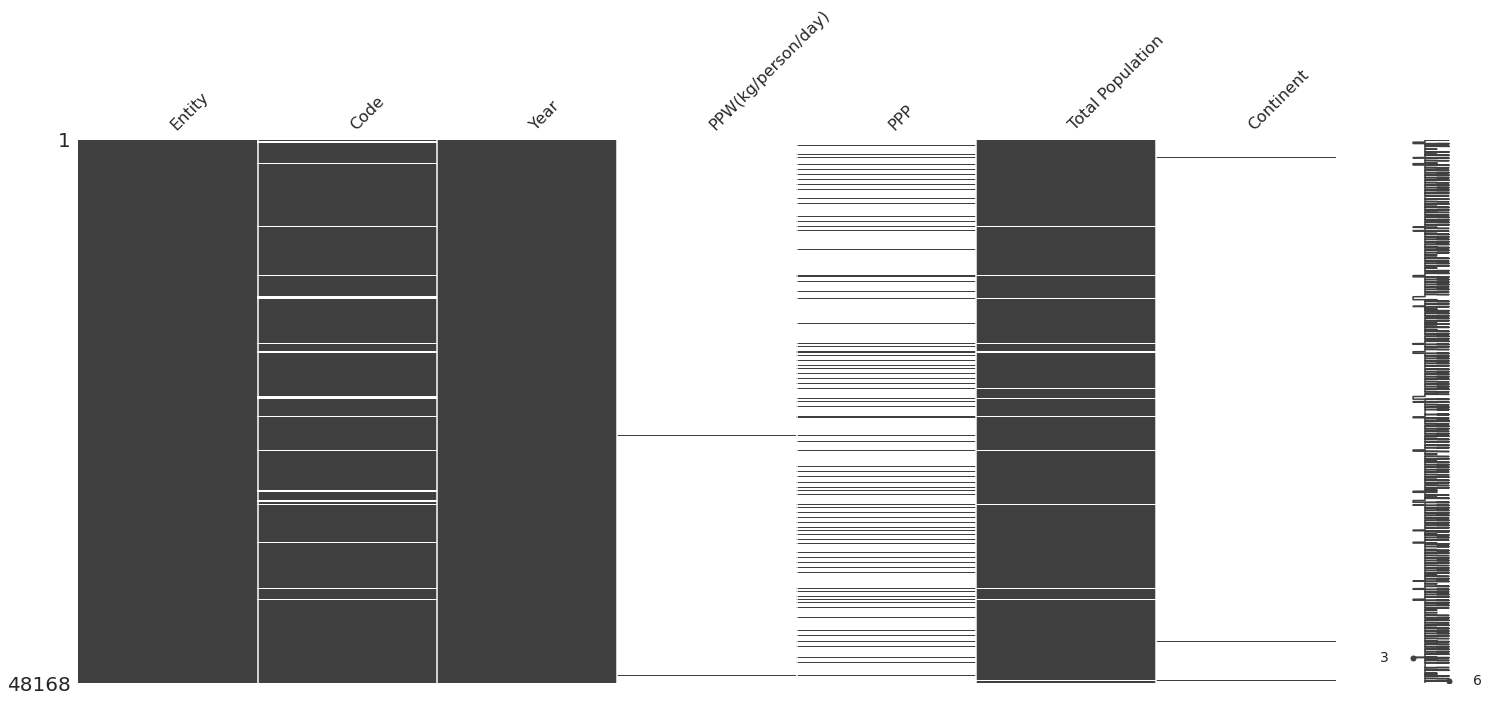

In [23]:
msno.matrix(df1)

In [4]:
df1.shape

(48168, 7)

In [12]:
print(sorted(list(df1['Year'].unique())))

[-10000, -9000, -8000, -7000, -6000, -5000, -4000, -3000, -2000, -1000, 0, 1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1

In [14]:
temp = sorted(list(df1['Entity'].unique()))
print(len(temp))
print(temp)

337
['Abkhazia', 'Afghanistan', 'Africa', 'Akrotiri and Dhekelia', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Austria-Hungary', 'Azerbaijan', 'Baden', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Bavaria', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Christmas Island', 'Cocos Islands', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech

1. Visualizing Missing Values
2. Handling Missing Values 
3. Missing Value Imputation

In [16]:
temp = list(df1['Continent'].unique())
print(len(temp))
print(temp)

8
['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America', 'Antarctica', 'South America']


<hr style="border-top: dotted 15px red;background-color:#0000">

In [39]:
df1.columns

Index(['Entity', 'Code', 'Year', 'PPW(kg/person/day)', 'PPP',
       'Total Population', 'Continent'],
      dtype='object')

In [45]:
## which year has minimum non-null values
## PPW is the variable of interest
temp = {}
for y in df1['Year'].unique():
    tdf = df1[df1['Year']==y]
    temp[y]=(1-tdf.isnull().sum()['PPW(kg/person/day)']/len(tdf))*100
for y in sorted(temp,key= lambda x:temp[x],reverse=True)[:10]:
    print(y,":",temp[y])
# for only 2010 year with 63.69 % of values

2010 : 63.6986301369863
2015 : 0.0
2002 : 0.0
2003 : 0.0
2004 : 0.0
2005 : 0.0
2006 : 0.0
2007 : 0.0
2008 : 0.0
2009 : 0.0


<AxesSubplot:>

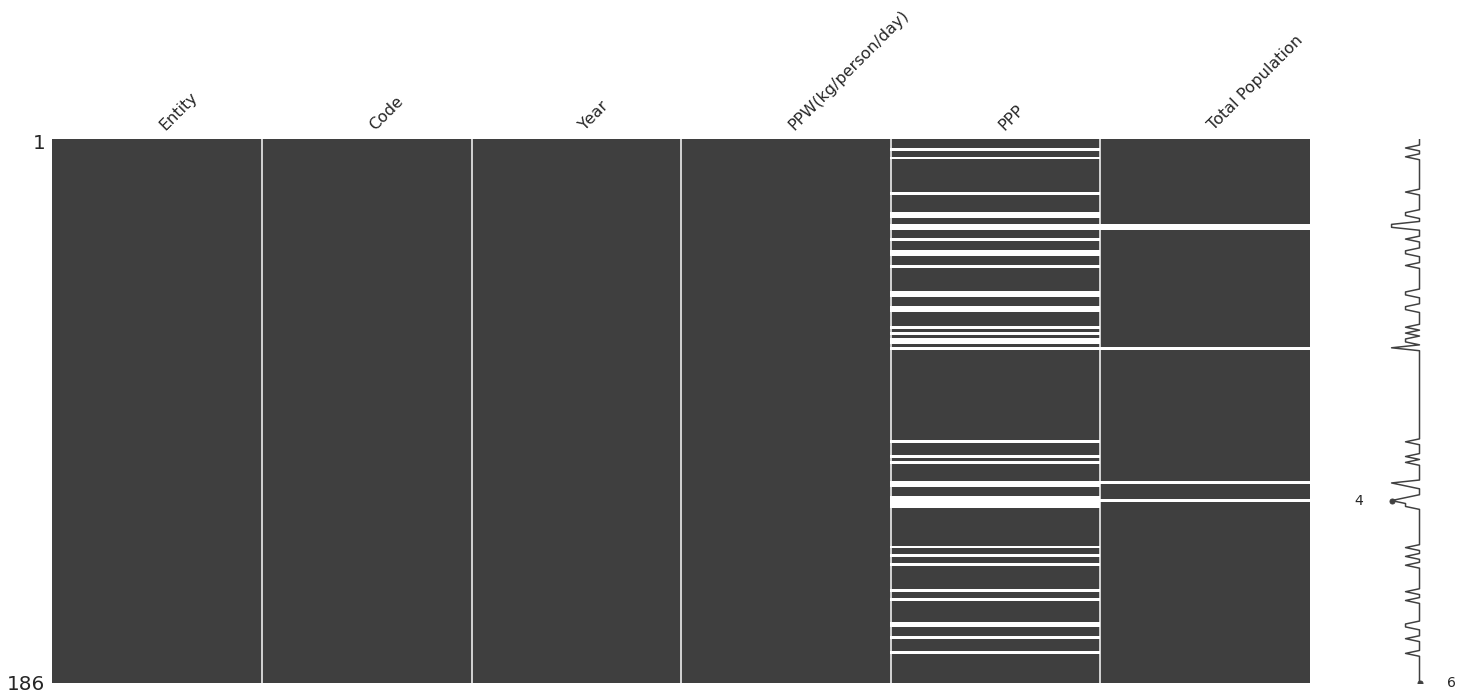

In [60]:
# df1_2010 = 
temp = df1[df1['Year']==2010]
df1_2010 = temp.dropna(subset=['PPW(kg/person/day)'])
msno.matrix(df1_2010)

In [70]:
df1_2010.head()

,Entity,Code,Year,PPW(kg/person/day),PPP,Total Population
19148,India,IND,2010,0.010,4404.697005,1.234281e+09
28777,Mozambique,MOZ,2010,0.015,917.763832,2.353200e+07
24933,Madagascar,MDG,2010,0.016,1385.685072,2.115200e+07
42346,Tanzania,TZA,2010,0.023,2090.583225,4.434700e+07
5980,Brunei,BRN,2010,0.026,80552.864471,3.890000e+05


In [104]:
print("Total number of rows :",len(df1_2010))
print("Total number of unique Entities :",len(df1_2010['Entity'].unique()))

Total number of rows : 186
Total number of unique Entities : 186


In [105]:
df1_2010=df1_2010.sort_values('PPW(kg/person/day)')
df1_2010=df1_2010.reset_index(drop=True)
df1_2010.head()

,Entity,Code,Year,PPW(kg/person/day),PPP,Total Population
0,India,IND,2010,0.010,4404.697005,1.234281e+09
1,Mozambique,MOZ,2010,0.015,917.763832,2.353200e+07
2,Madagascar,MDG,2010,0.016,1385.685072,2.115200e+07
3,Tanzania,TZA,2010,0.023,2090.583225,4.434700e+07
4,Brunei,BRN,2010,0.026,80552.864471,3.890000e+05


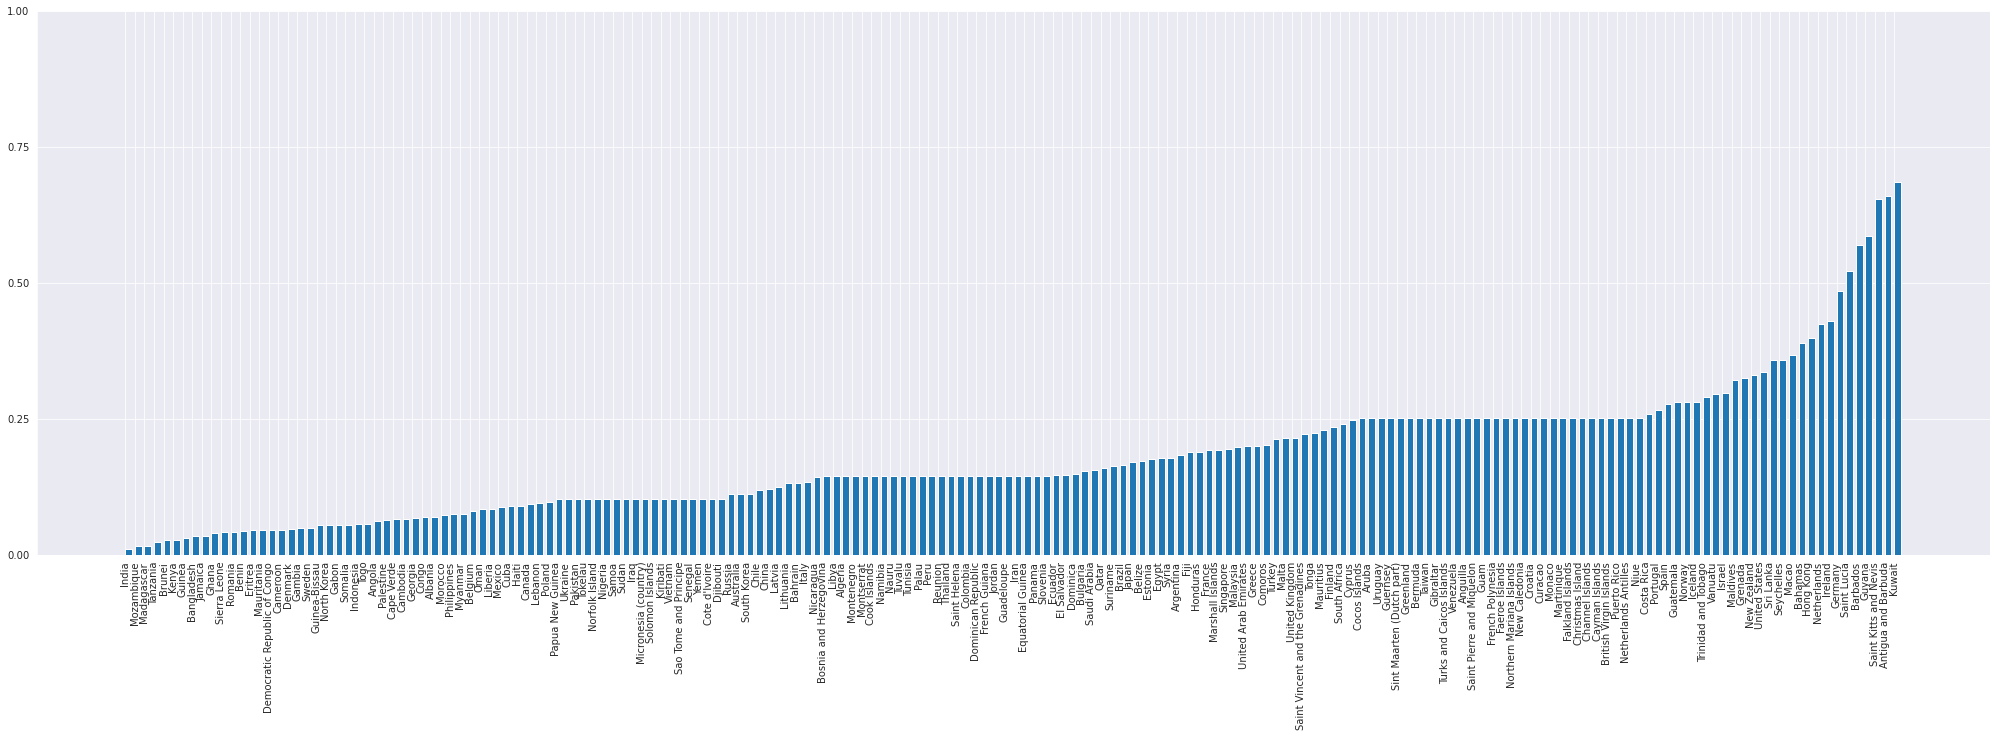

In [109]:
temp_df = df1_2010
x = temp_df['Entity']
y = temp_df['PPW(kg/person/day)']

plt.rcParams["figure.figsize"] = (35,10) #width , height
plt.xticks(rotation = 90)
plt.bar(x,y,align='edge', width=0.7)
plt.yticks([0,0.25,0.5,0.75,1])
plt.show()

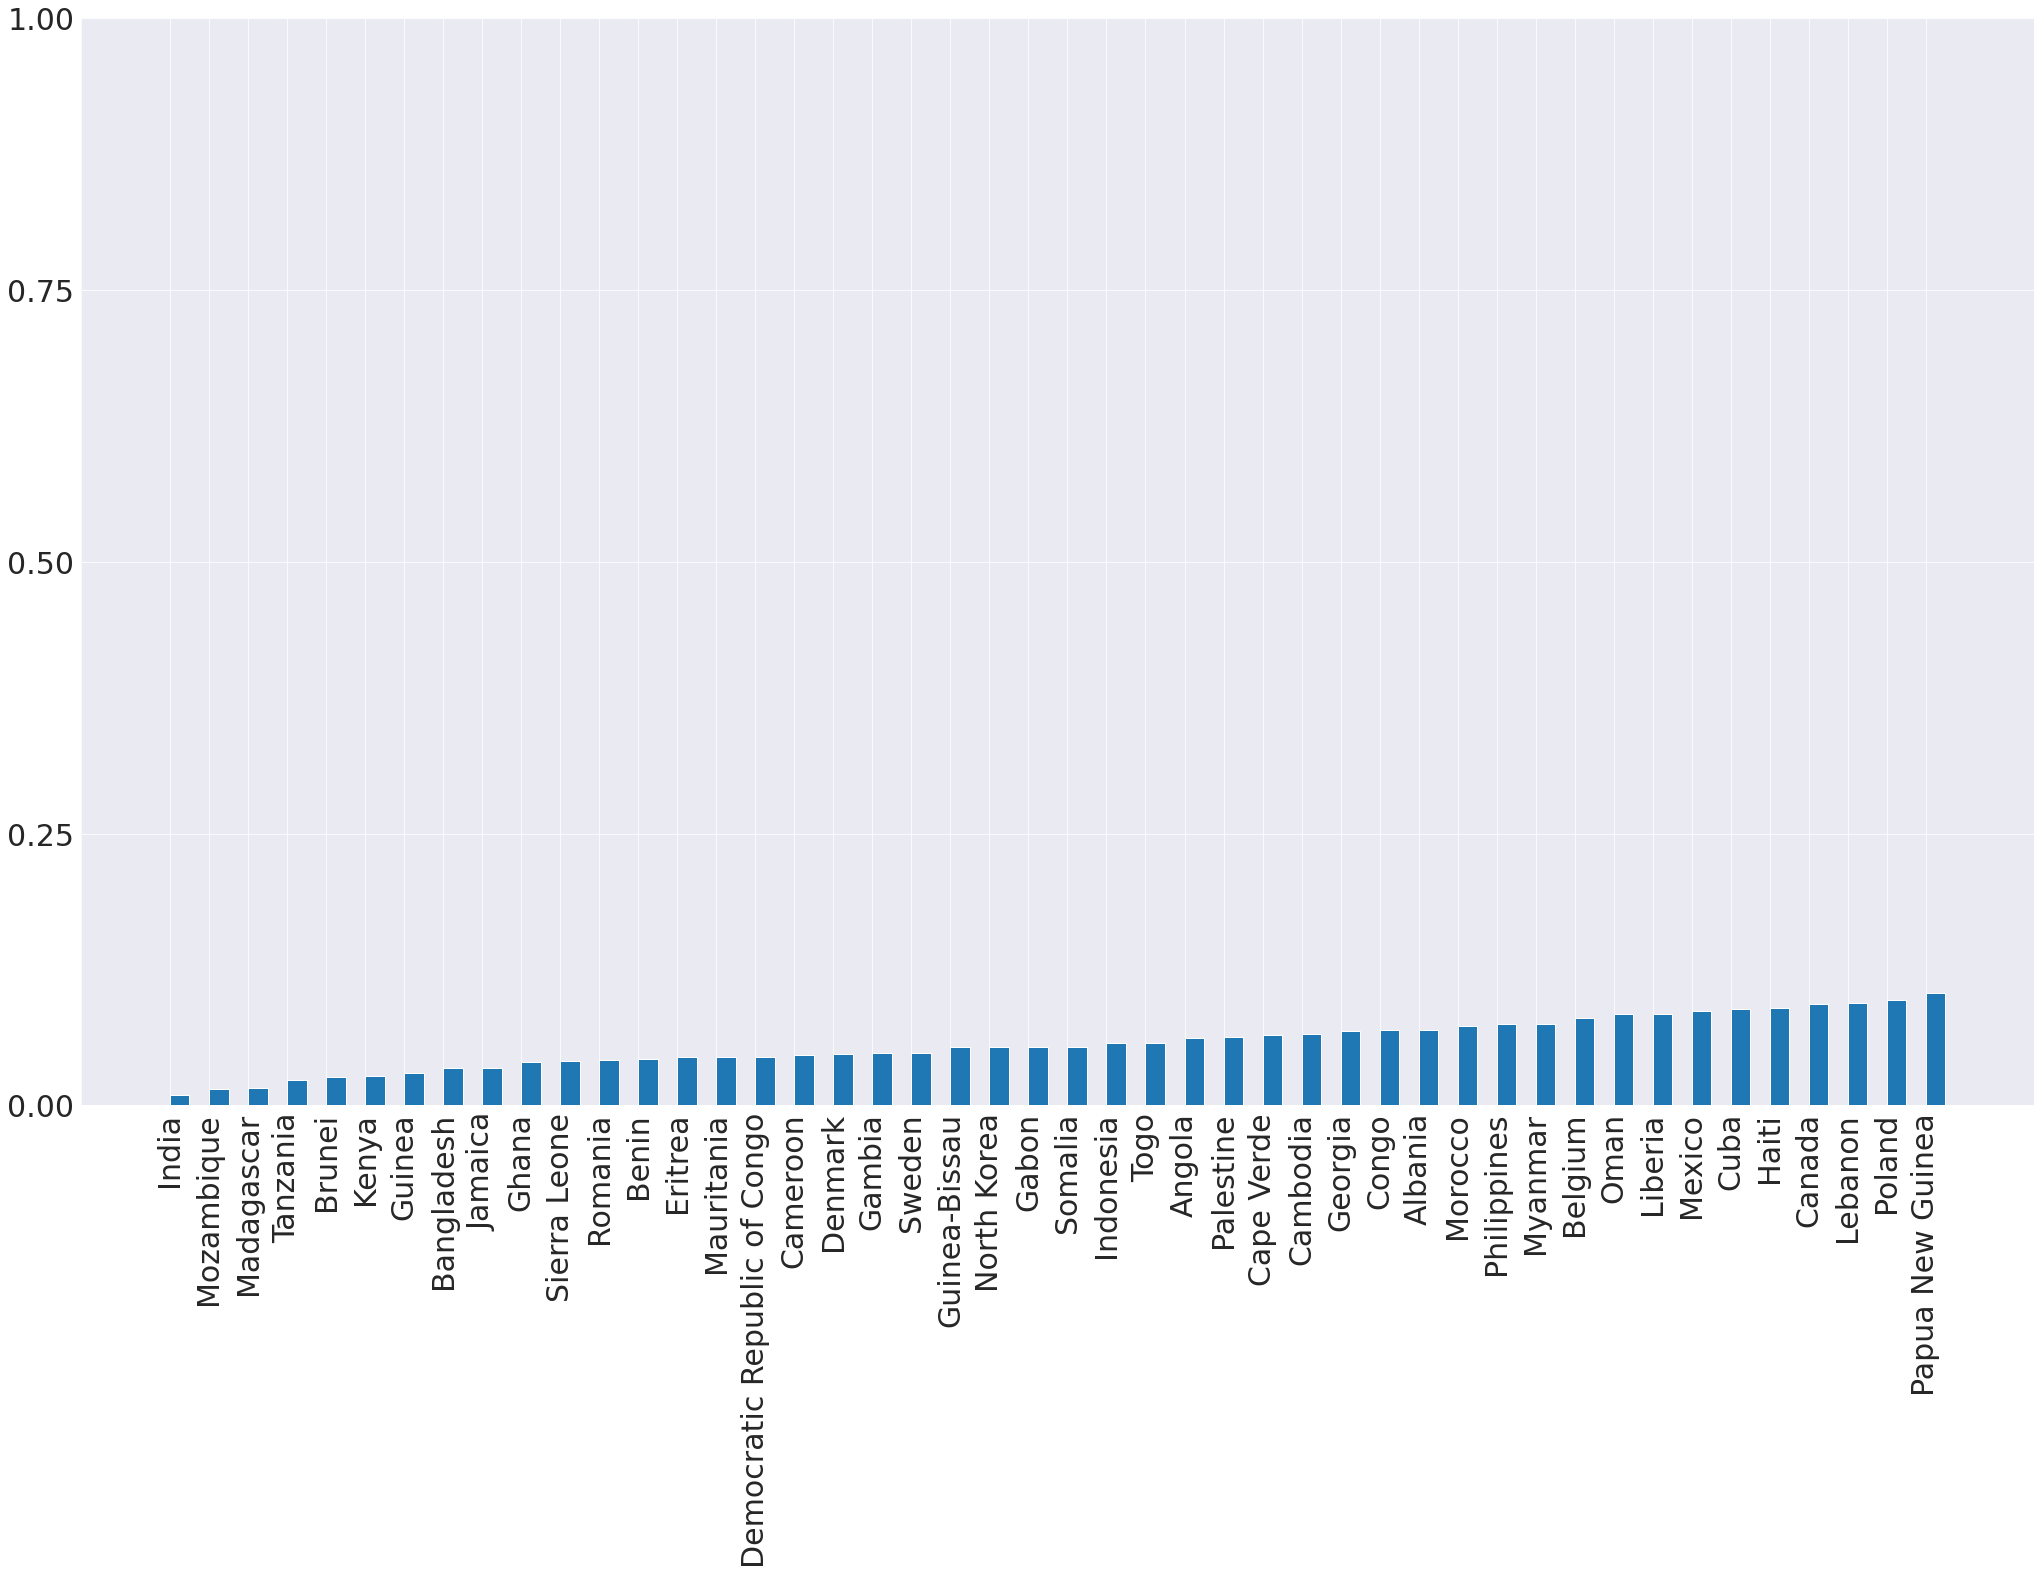

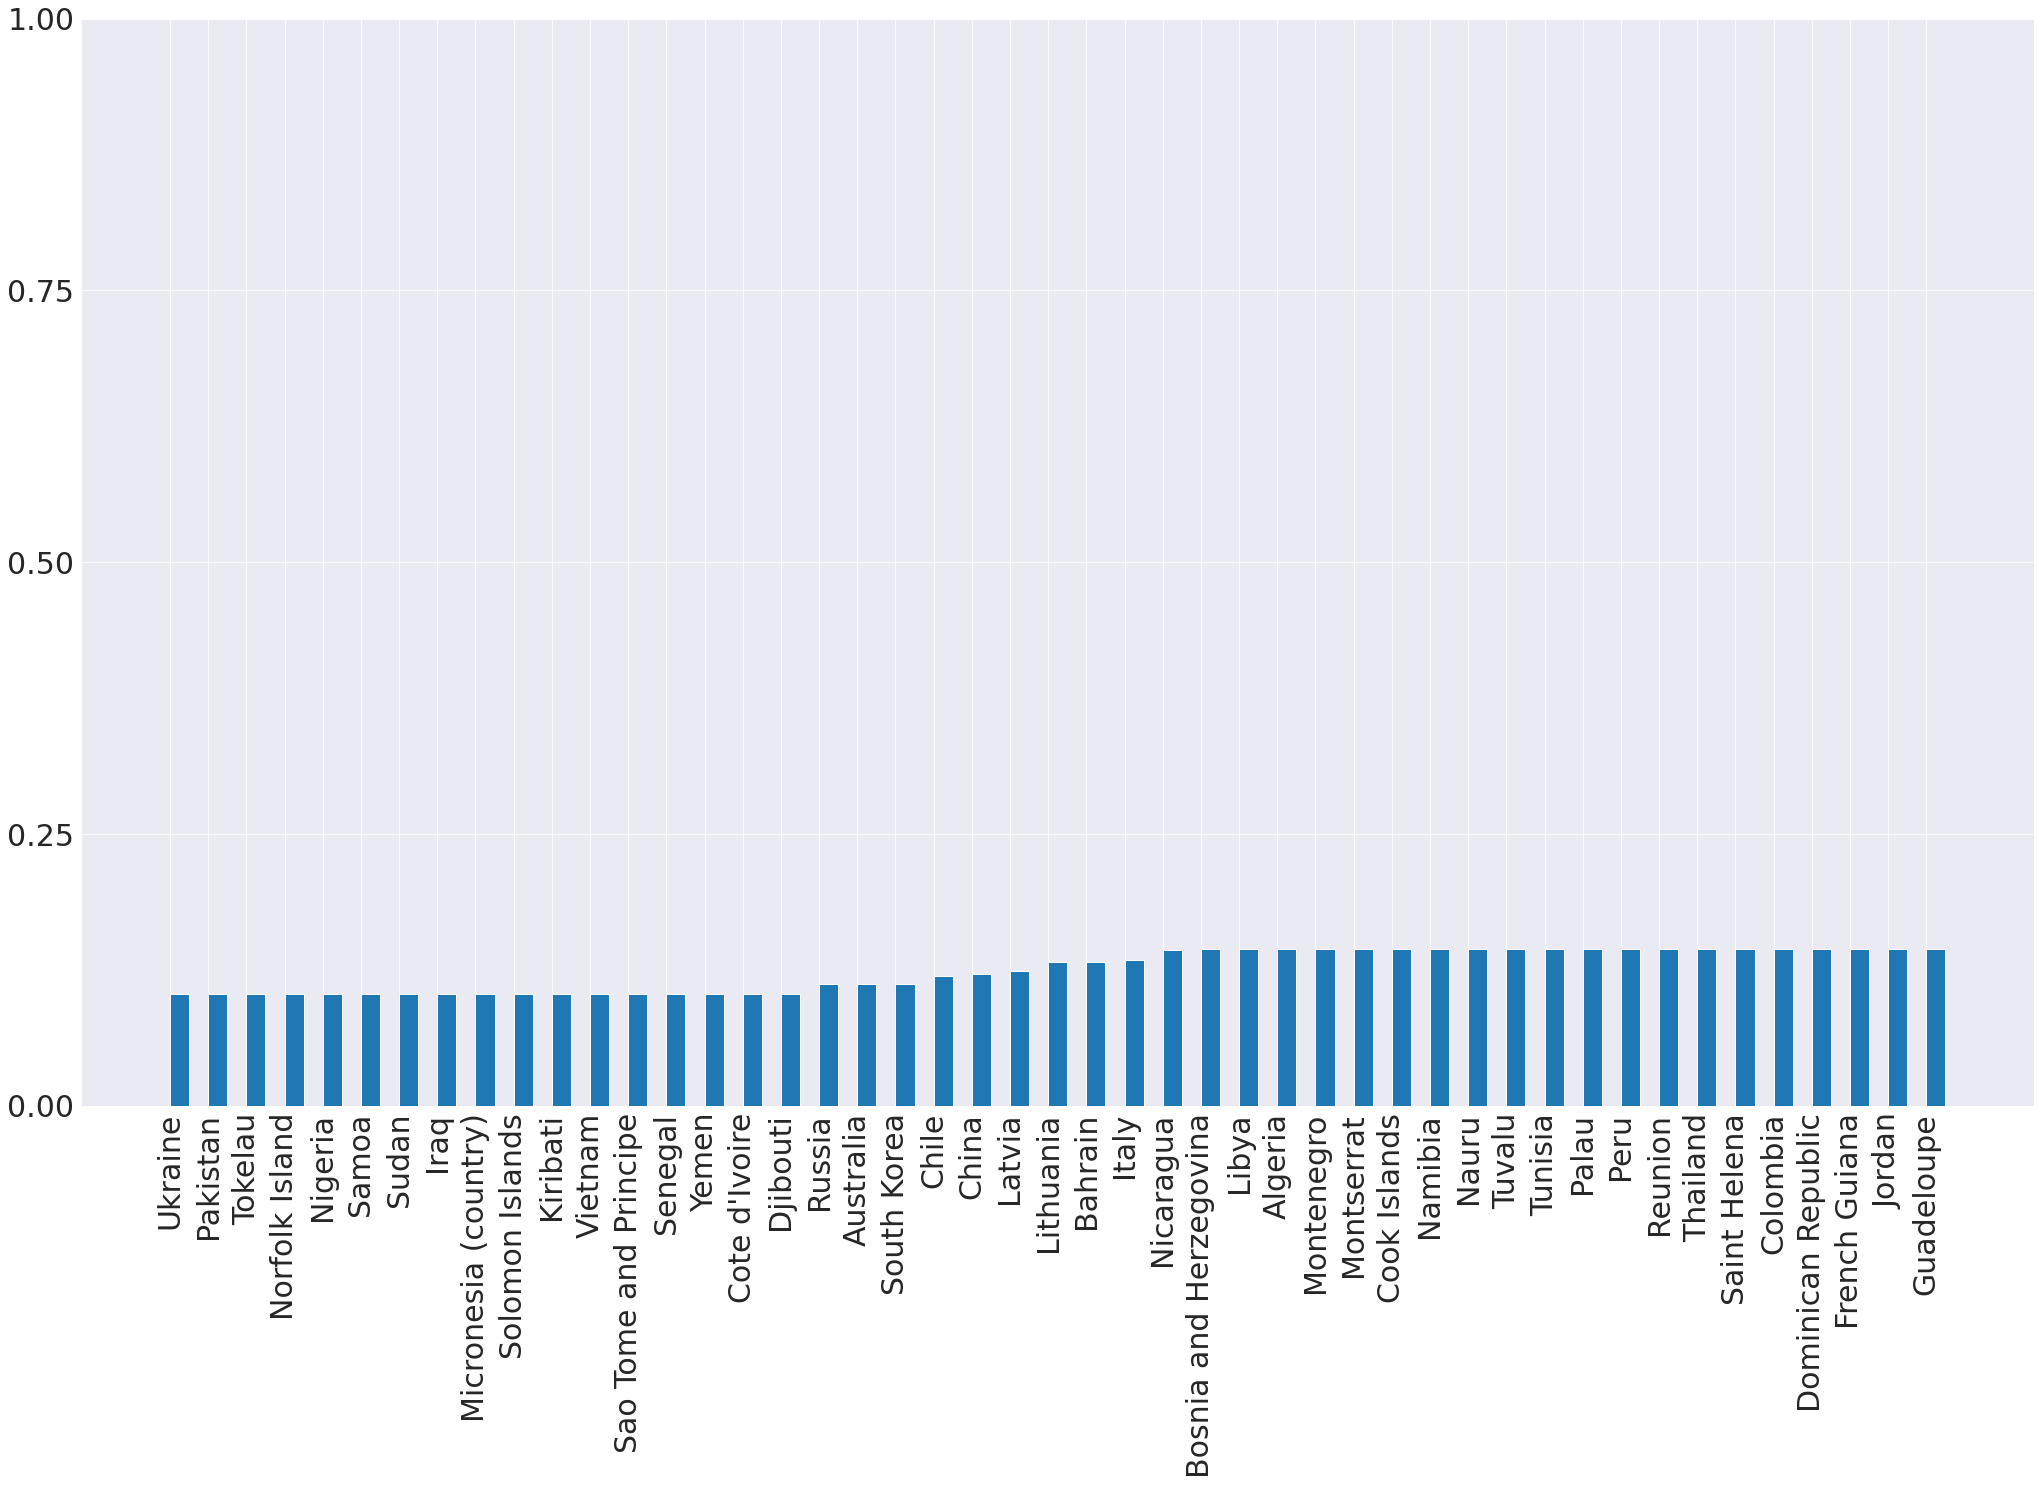

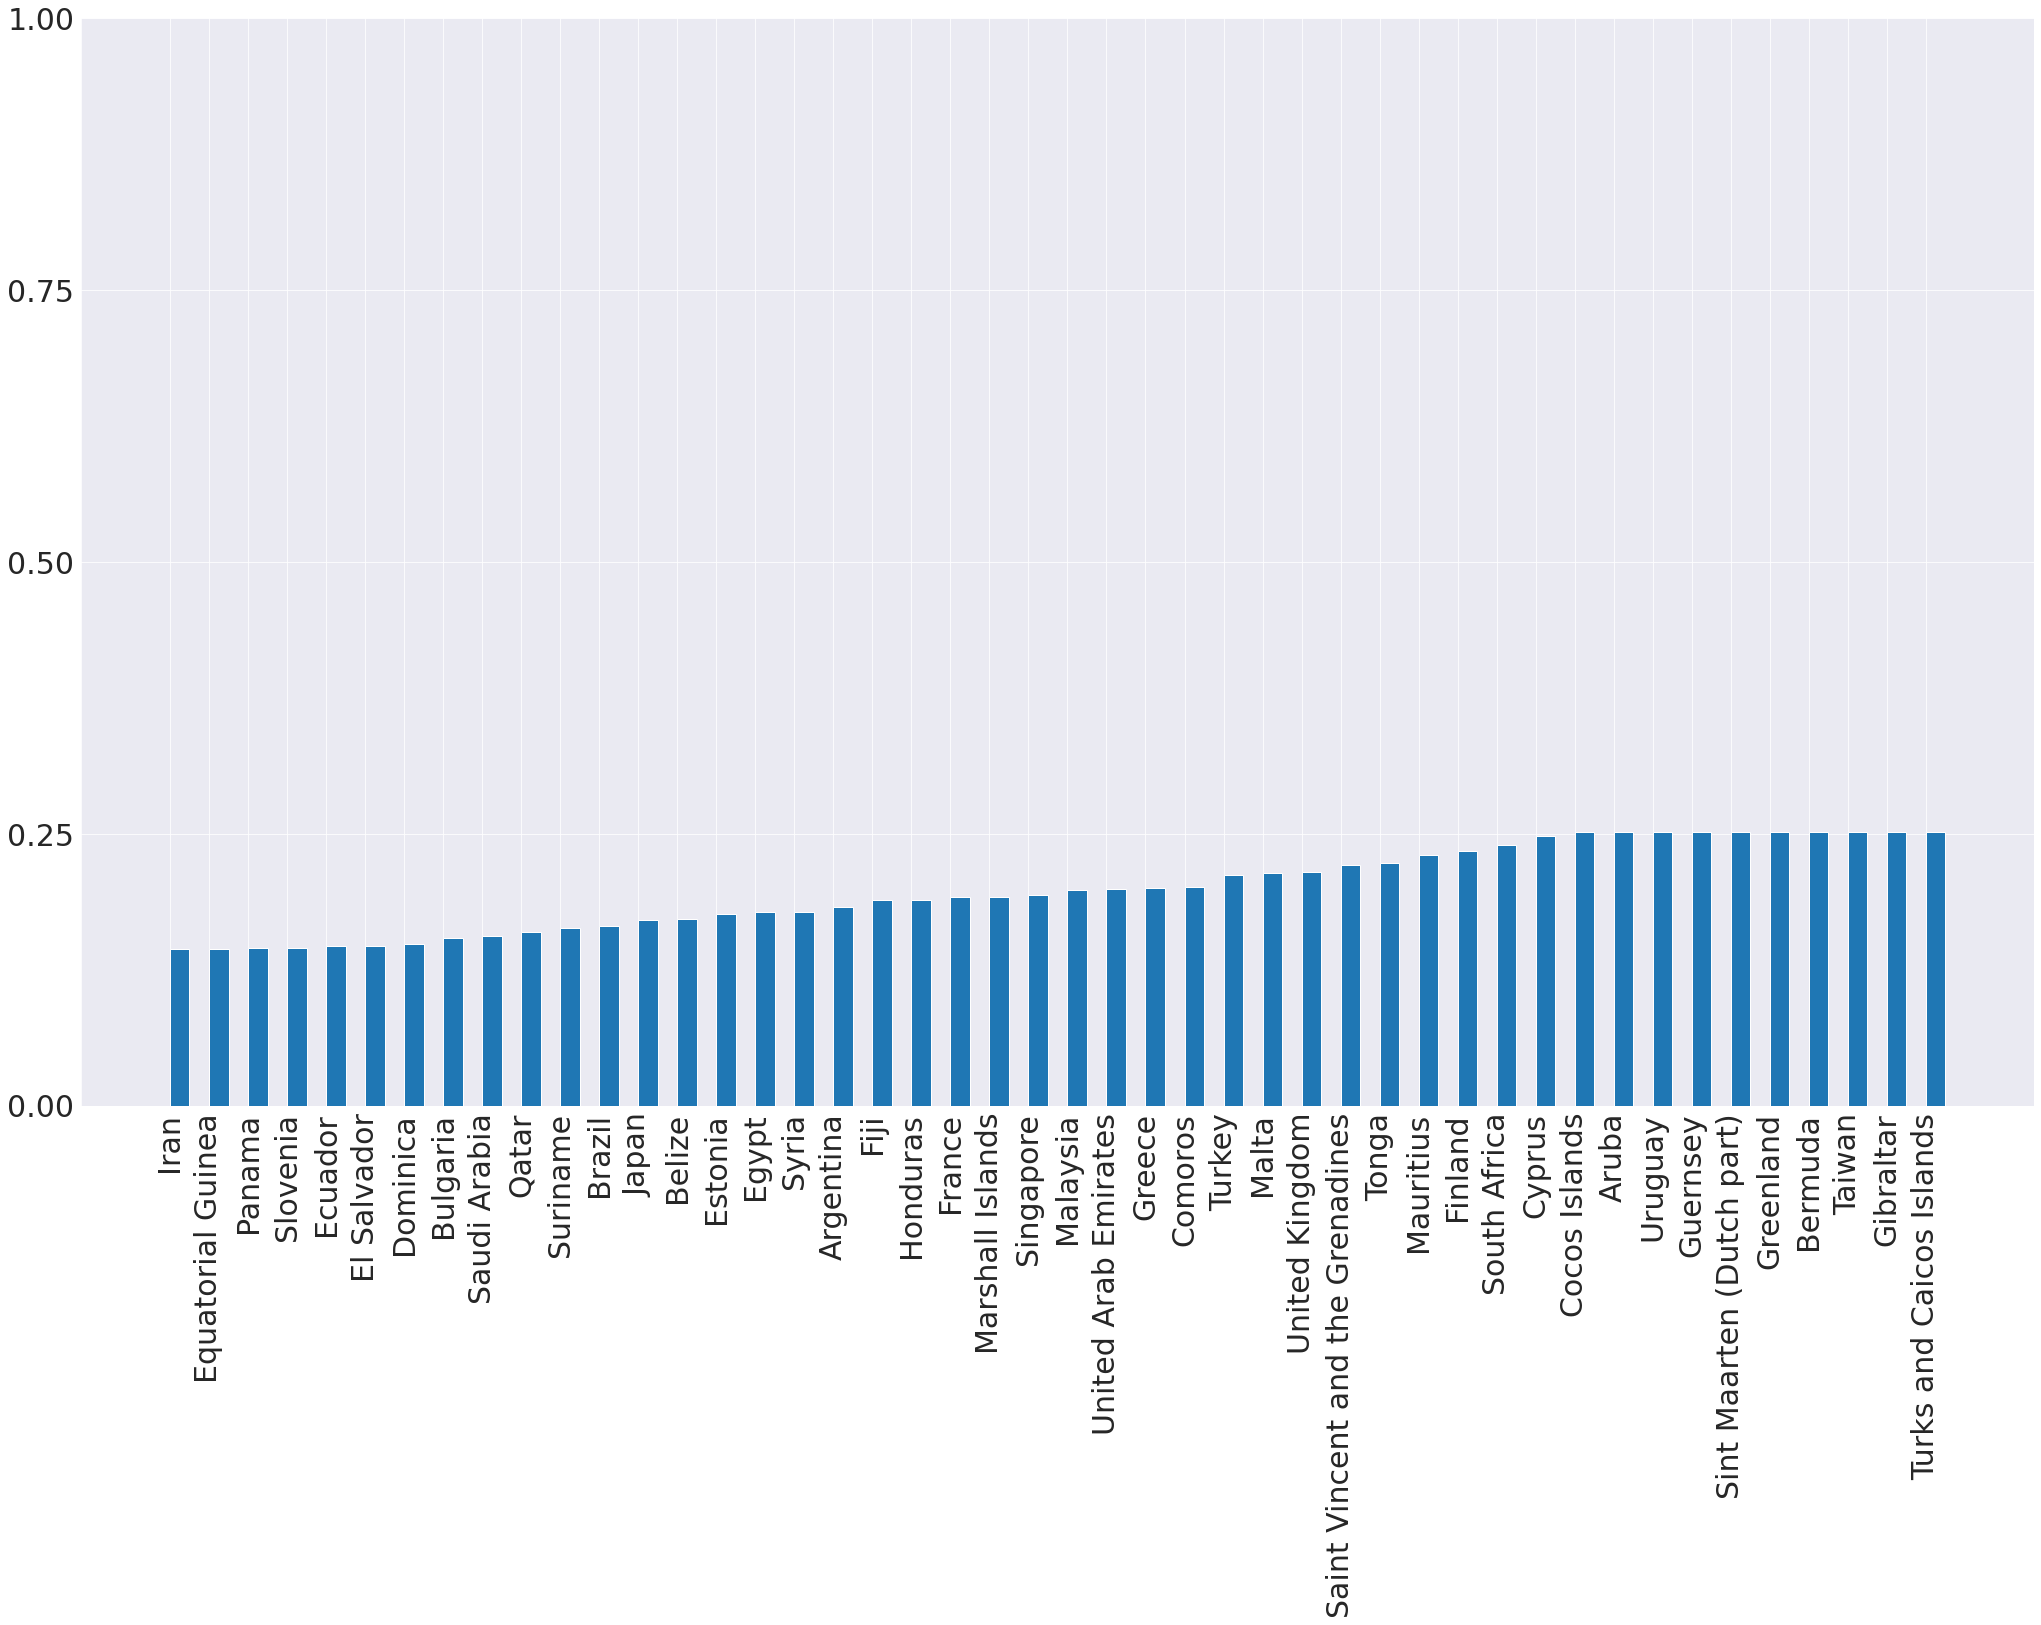

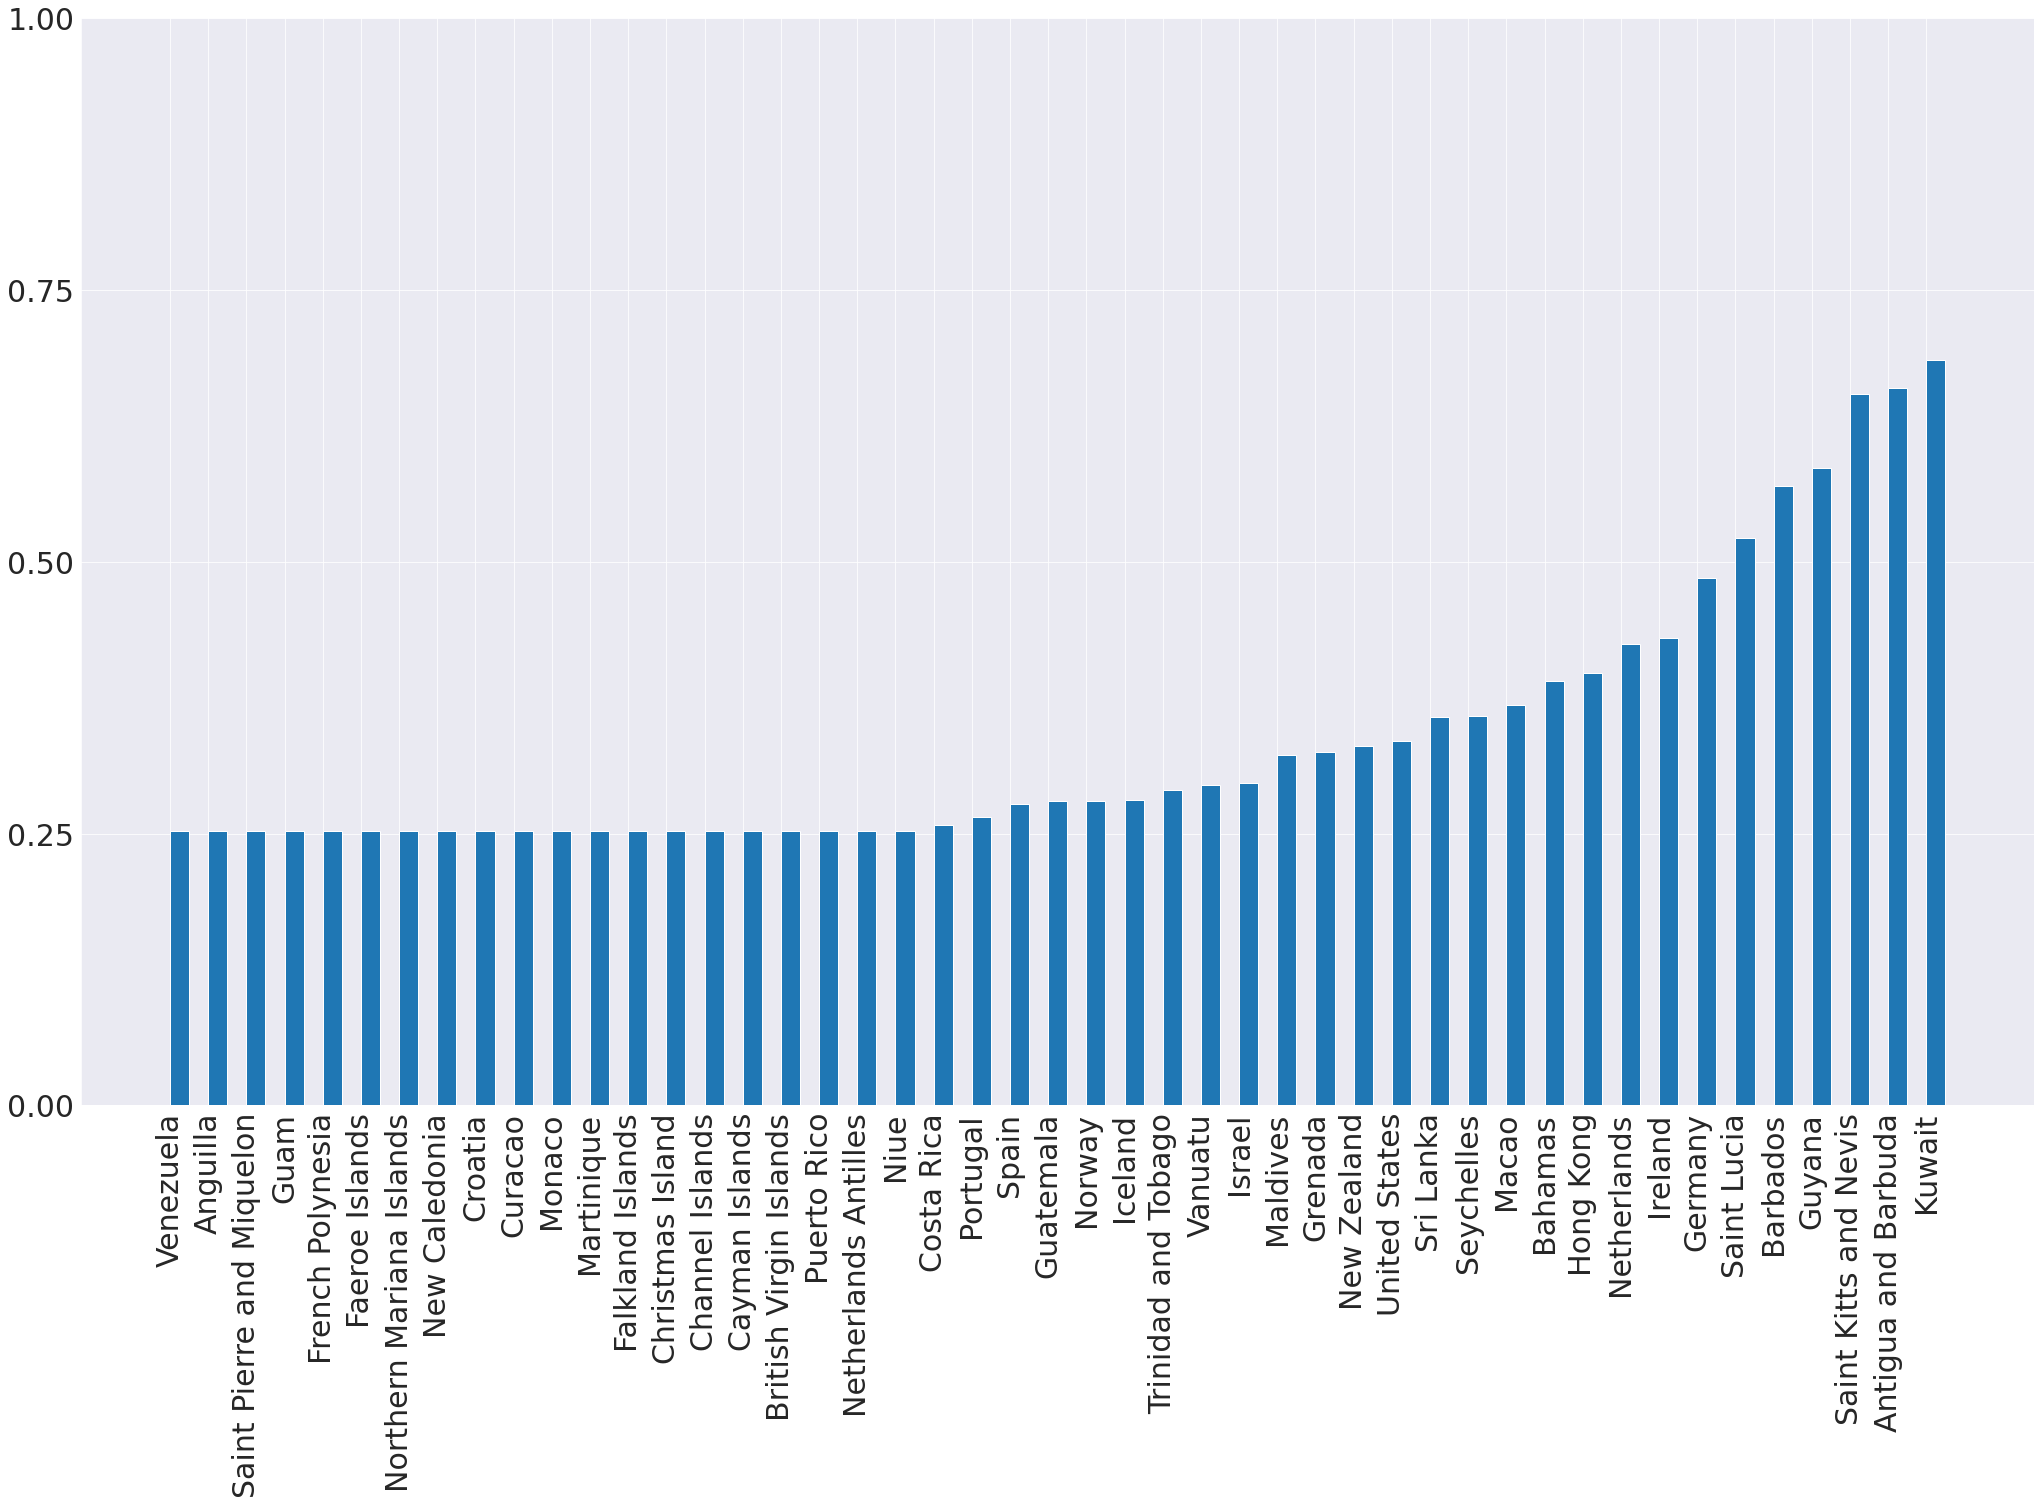

In [133]:
temp = 4
for i in range(0,temp):
#     if i > 2:
#         continue
    l = 186
    n = temp
    ub,lb = int(i/n*l),int(((i+1)/n)*l)
    temp_df = df1_2010.iloc[ub:lb]
    x = temp_df['Entity']
    y = temp_df['PPW(kg/person/day)']
    plt.rcParams["figure.figsize"] = (35,20) #width , height
    plt.xticks(rotation = 90,fontsize=30)
    plt.bar(x,y,align='edge', width=0.5)
    plt.yticks([0,0.25,0.5,0.75,1],fontsize=30)
    plt.show()

<hr style="border-top: dotted 15px red;background-color:#0000">

In [139]:
df1_2010.to_csv('./PPW-vs-PPP-2010.csv',index=False,)

<hr style="border-top: dotted 15px red;background-color:#0000">

In [157]:
df2 = pd.read_csv('./per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')
df2.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [158]:
df2.columns

Index(['Entity', 'Code', 'Year', 'Per capita mismanaged plastic waste',
       'GDP per capita, PPP (constant 2011 international $)',
       'Total population (Gapminder, HYDE & UN)', 'Continent'],
      dtype='object')

In [159]:
df2.rename(
    columns={
        'Per capita mismanaged plastic waste': 'PMPW', 
        'GDP per capita, PPP (constant 2011 international $)': 'PPP',
        'Total population (Gapminder, HYDE & UN)': 'Total population'
    },inplace=True)
df2.head()

,Entity,Code,Year,PMPW,PPP,Total population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [160]:
## which year has minimum non-null values
## PPW is the variable of interest
temp = {}
for y in df2['Year'].unique():
    colm = 'PMPW'
    tdf = df2[df2['Year']==y]
    temp[y]=(1-tdf.isnull().sum()[colm]/len(tdf))*100
for y in sorted(temp,key= lambda x:temp[x],reverse=True)[:10]:
    print(y,":",temp[y])
# for only 2010 year with 63.69 % of values

2010 : 63.6986301369863
2015 : 0.0
2002 : 0.0
2003 : 0.0
2004 : 0.0
2005 : 0.0
2006 : 0.0
2007 : 0.0
2008 : 0.0
2009 : 0.0


In [174]:
## Starting from df2
df2_2010 = df2[df2['Year']==2010] ## first year == 2010
df2_2010 = df2.dropna(subset=['PMPW']) ##second PMPW not null
df2_2010=df2_2010.sort_values('PMPW') ## sorting values by PMPW
df2_2010=df2_2010.reset_index(drop=True) ## resetting index
df2_2010.head()

,Entity,Code,Year,PMPW,PPP,Total population,Continent
0,Brunei,BRN,2010,0.001,80552.864471,389000.0,NaN
1,South Korea,KOR,2010,0.001,30352.104819,49546000.0,NaN
2,Sweden,SWE,2010,0.001,42942.562503,9390000.0,NaN
3,Denmark,DNK,2010,0.001,43998.436672,5555000.0,NaN
4,Canada,CAN,2010,0.002,40699.355129,34148000.0,NaN


<AxesSubplot:>

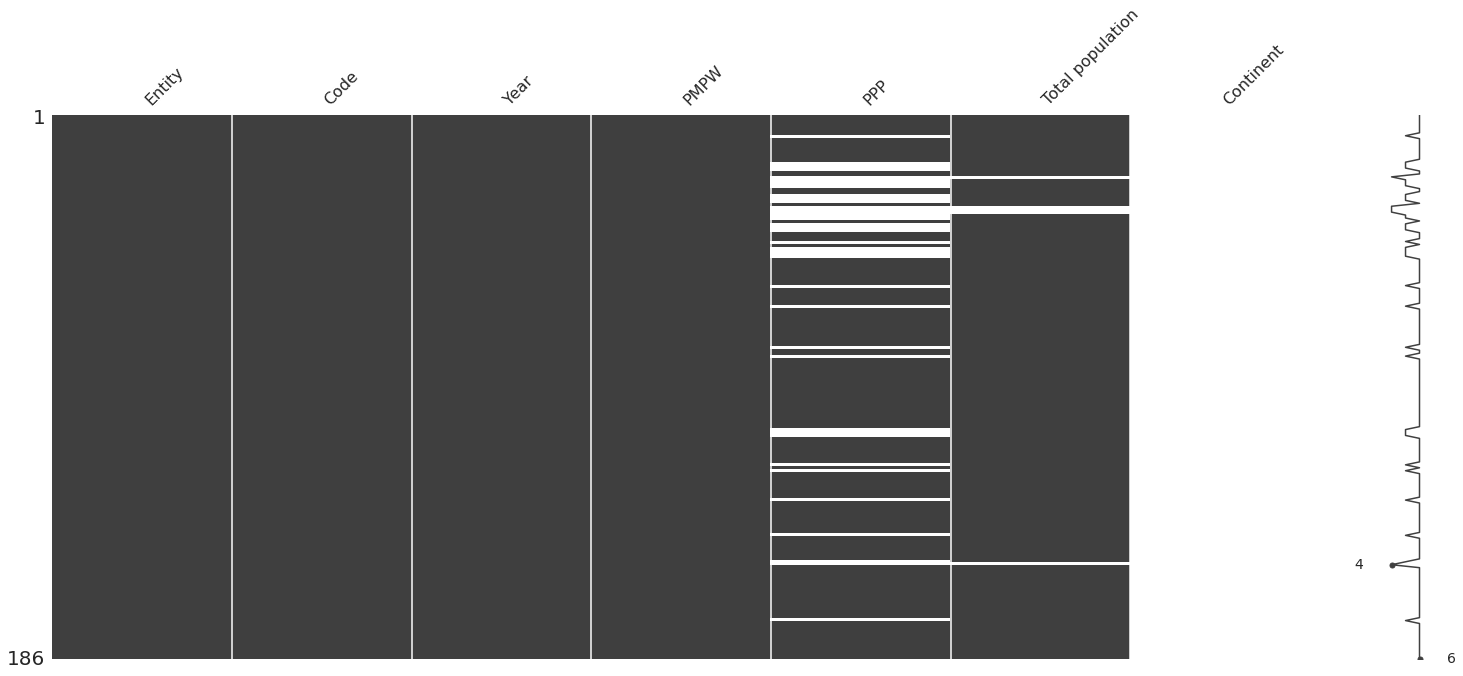

In [175]:
msno.matrix(df2_2010)

In [176]:
len(df2_2010)

186

In [177]:
max(df2_2010['PMPW'])

0.299

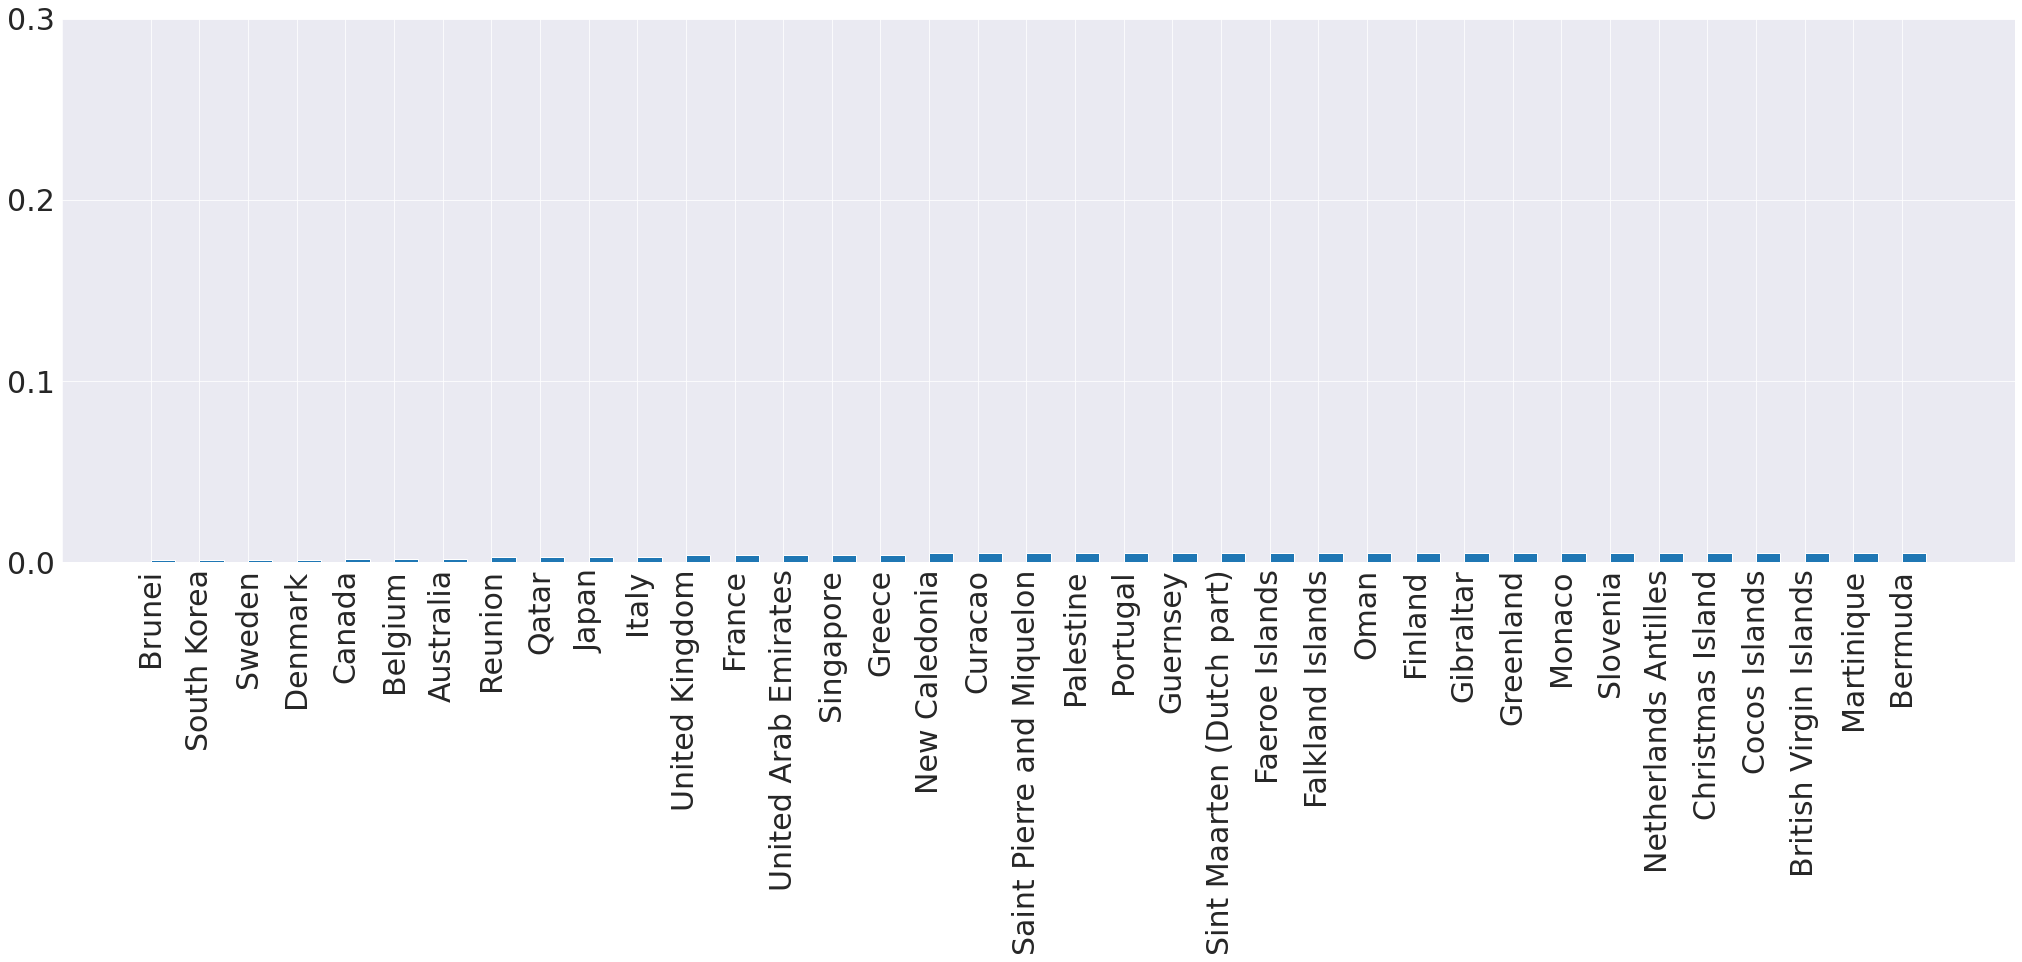

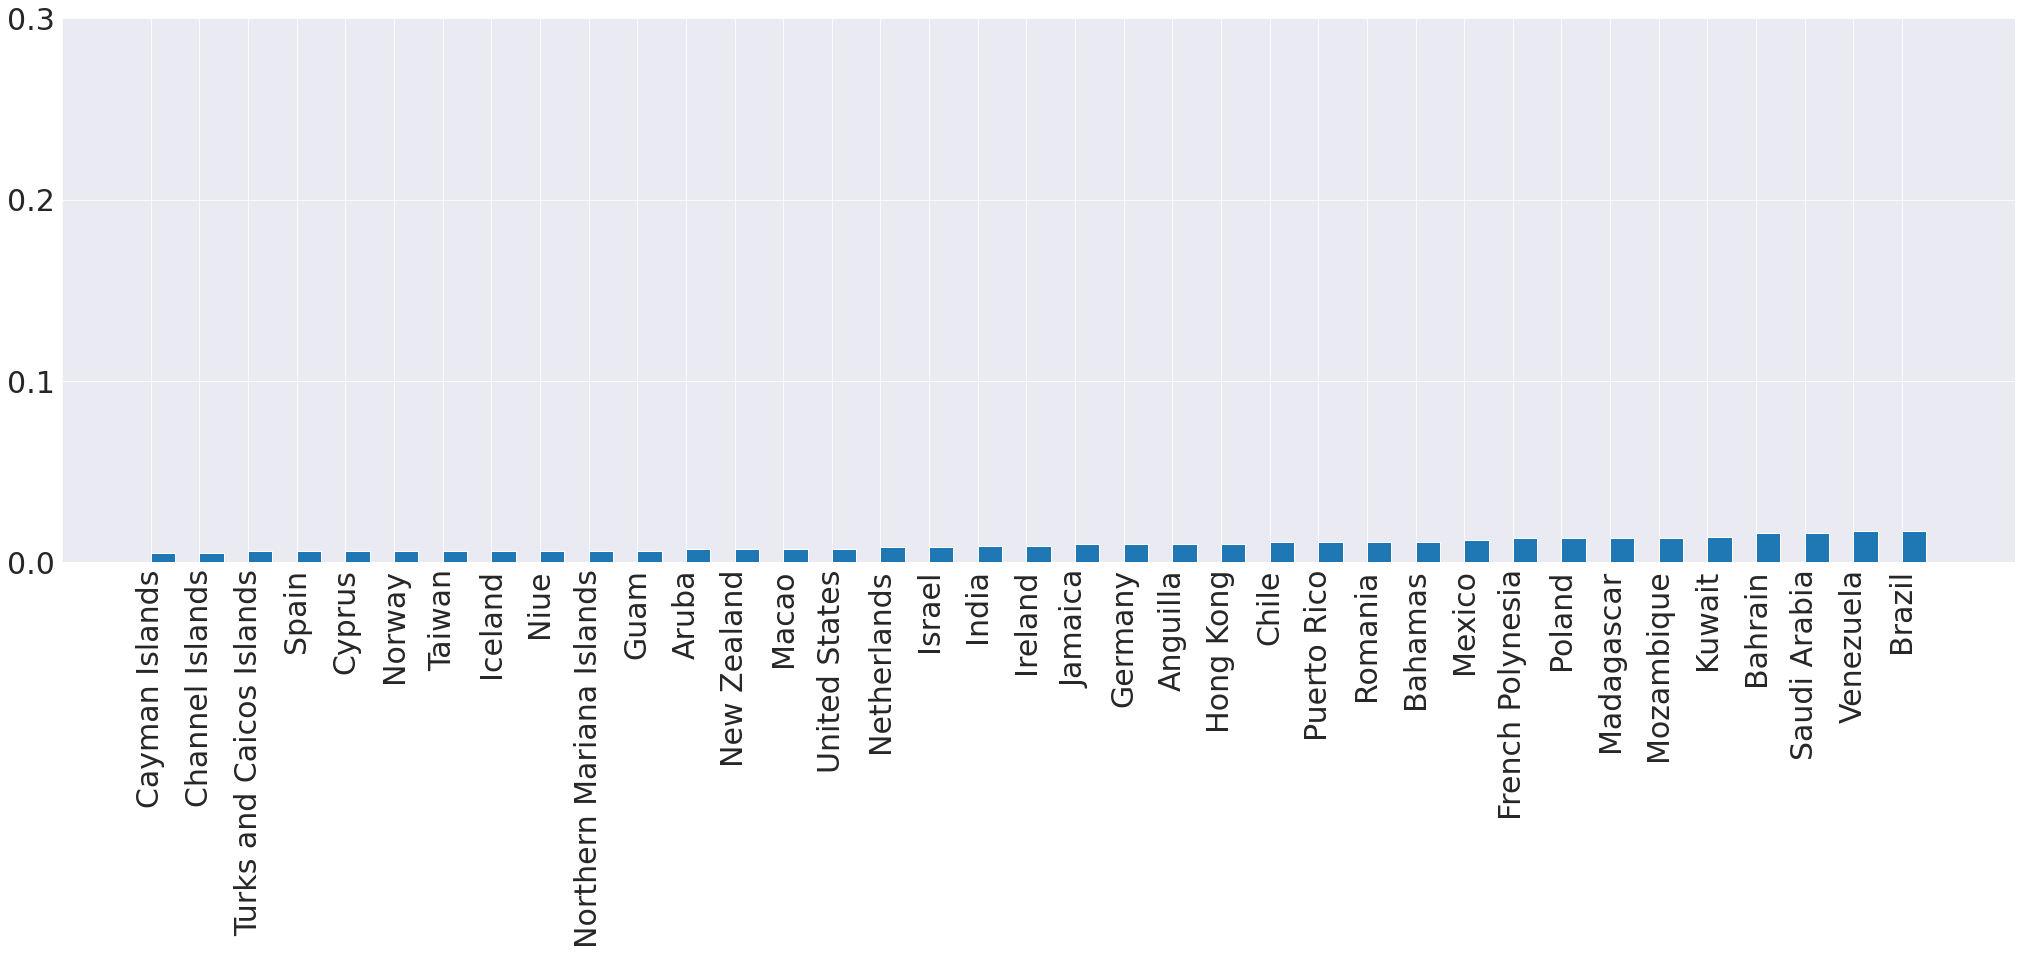

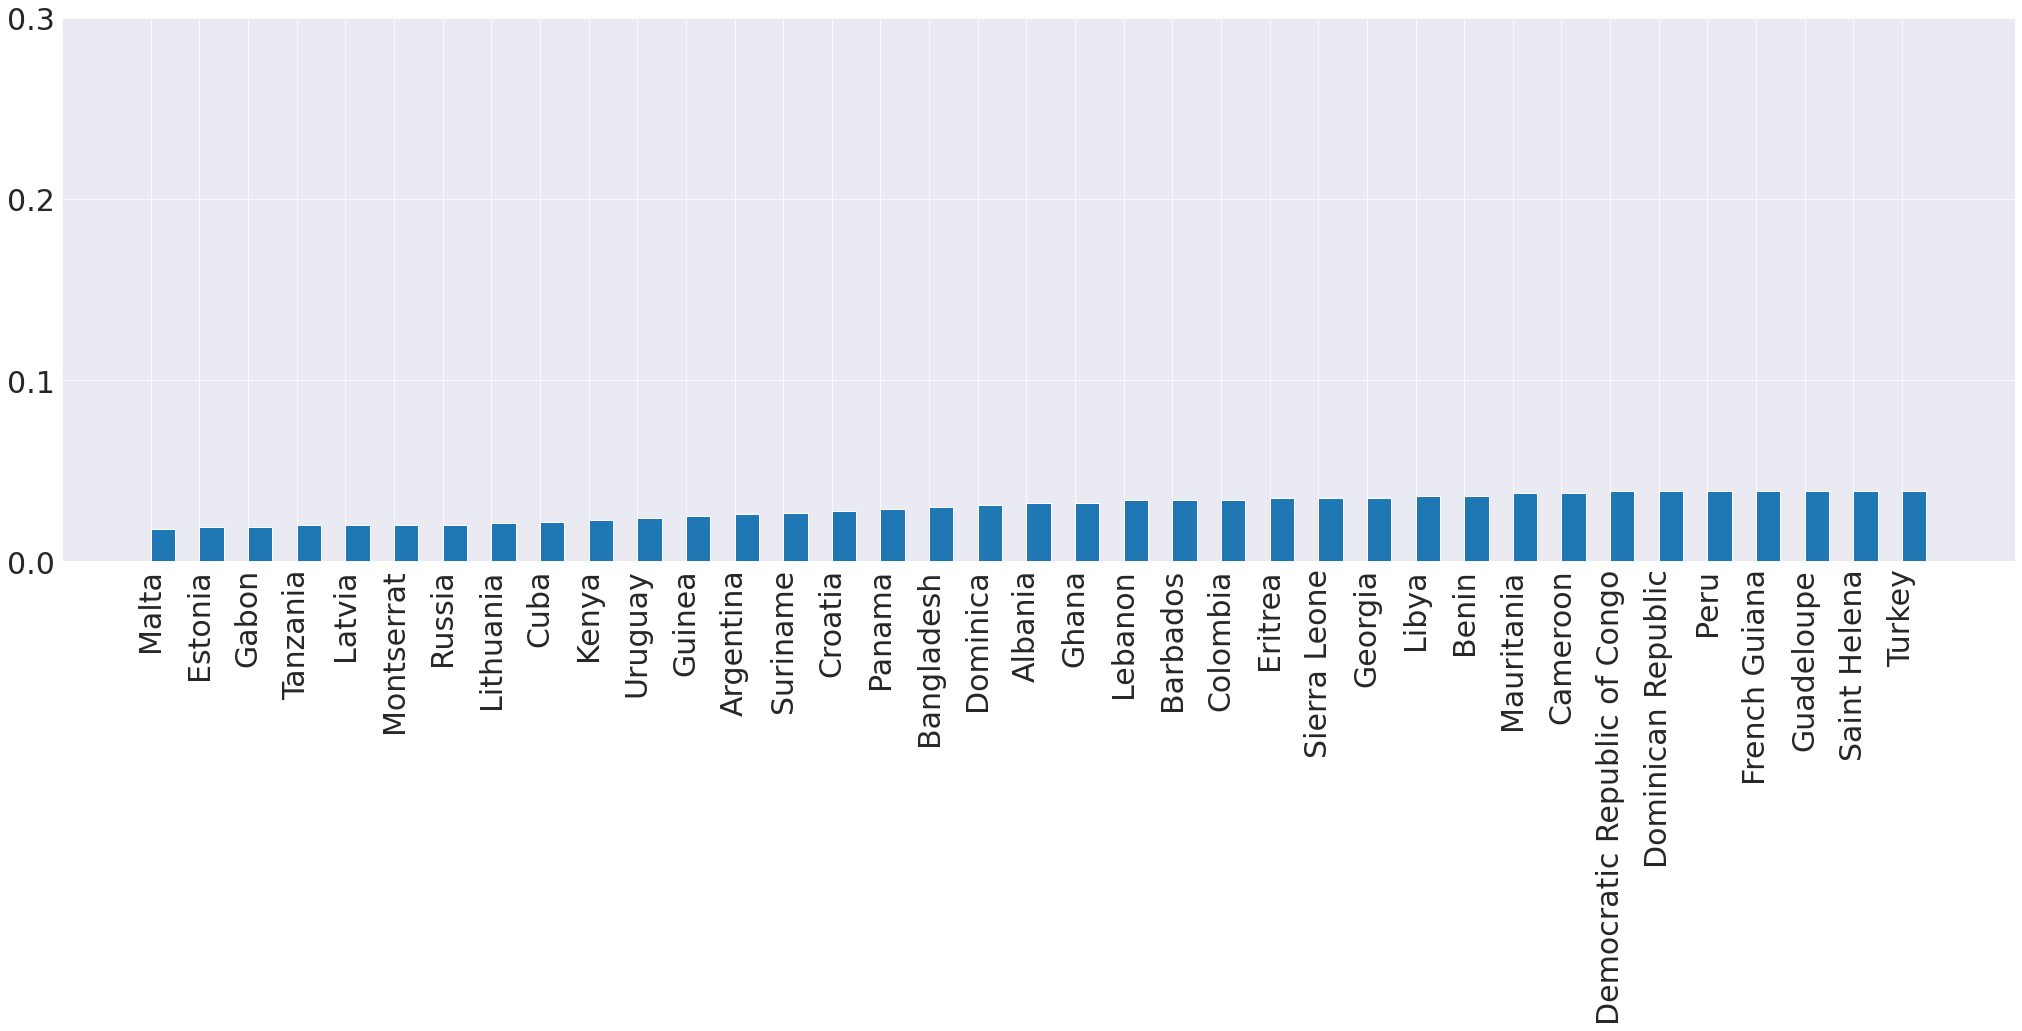

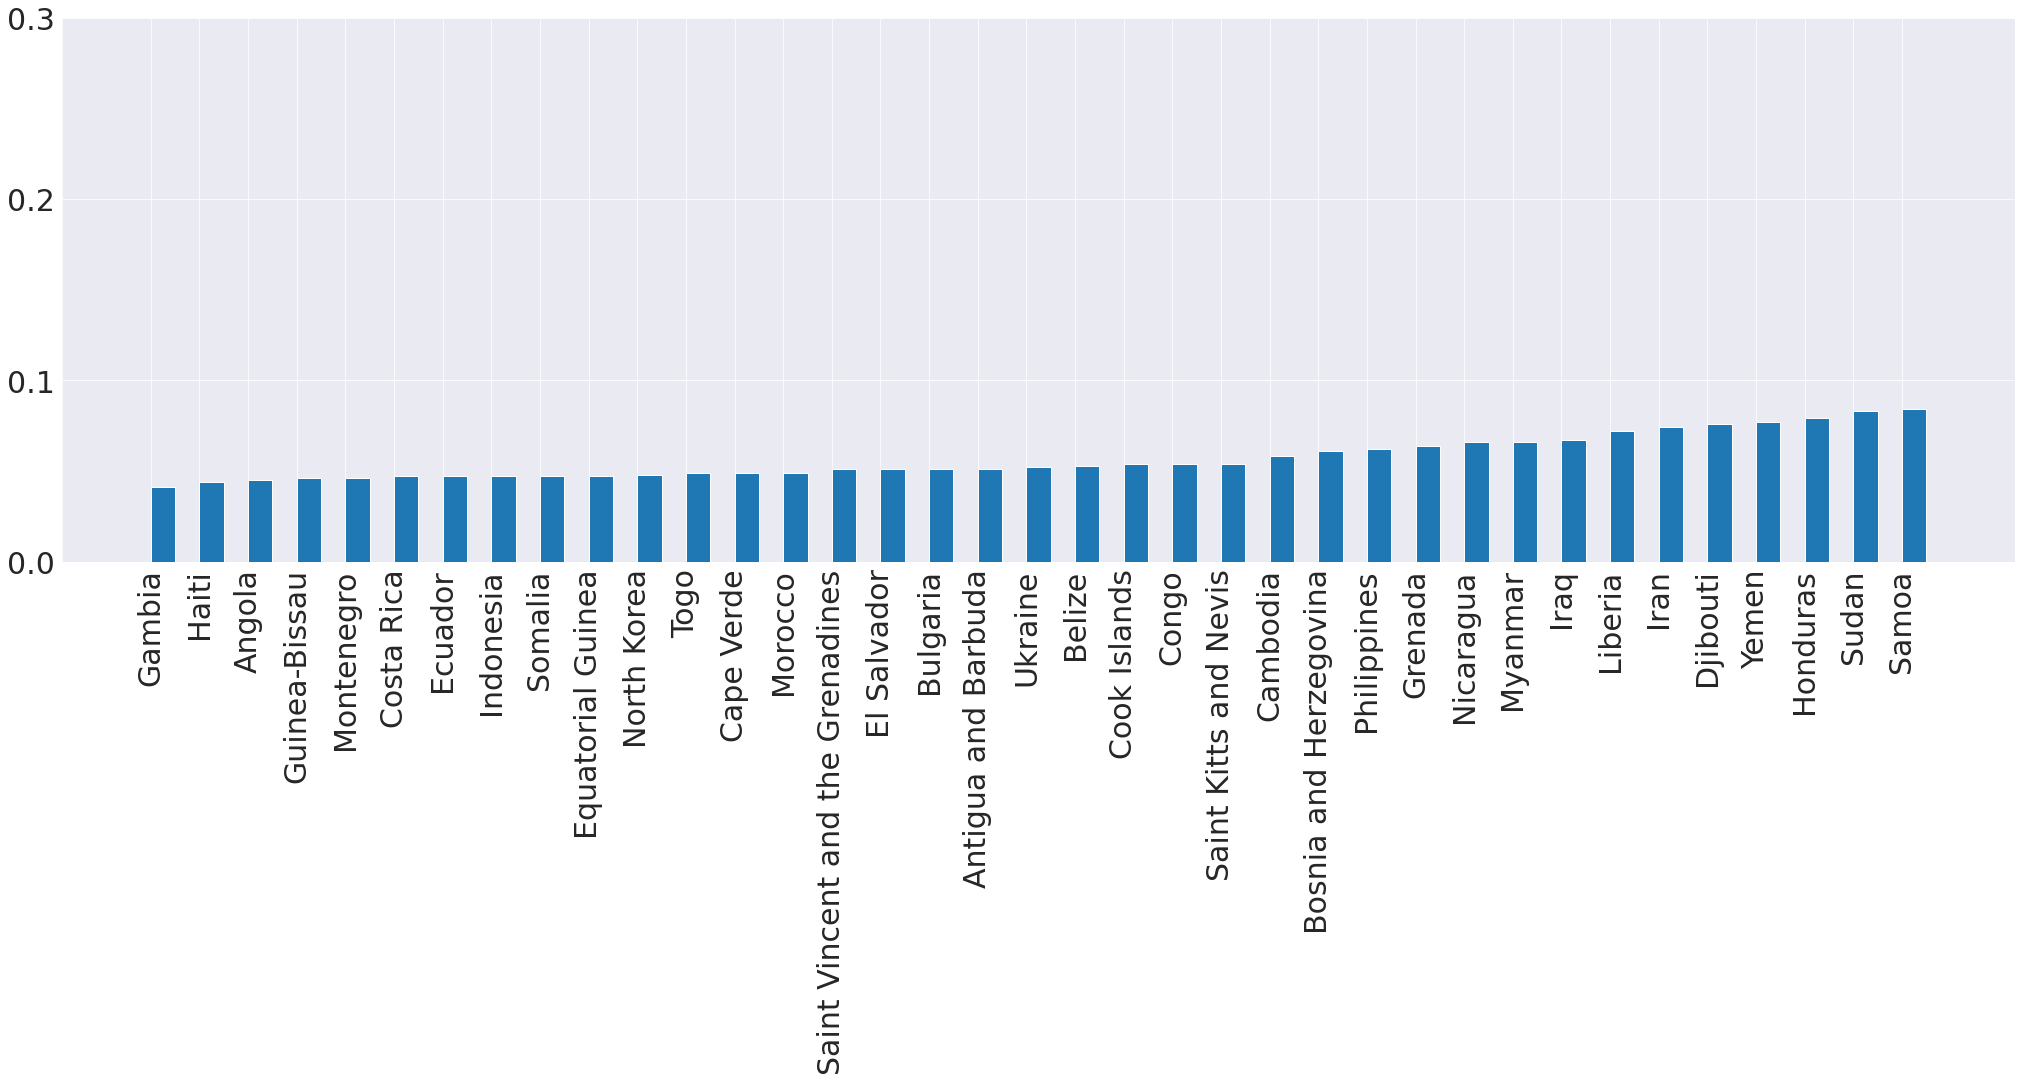

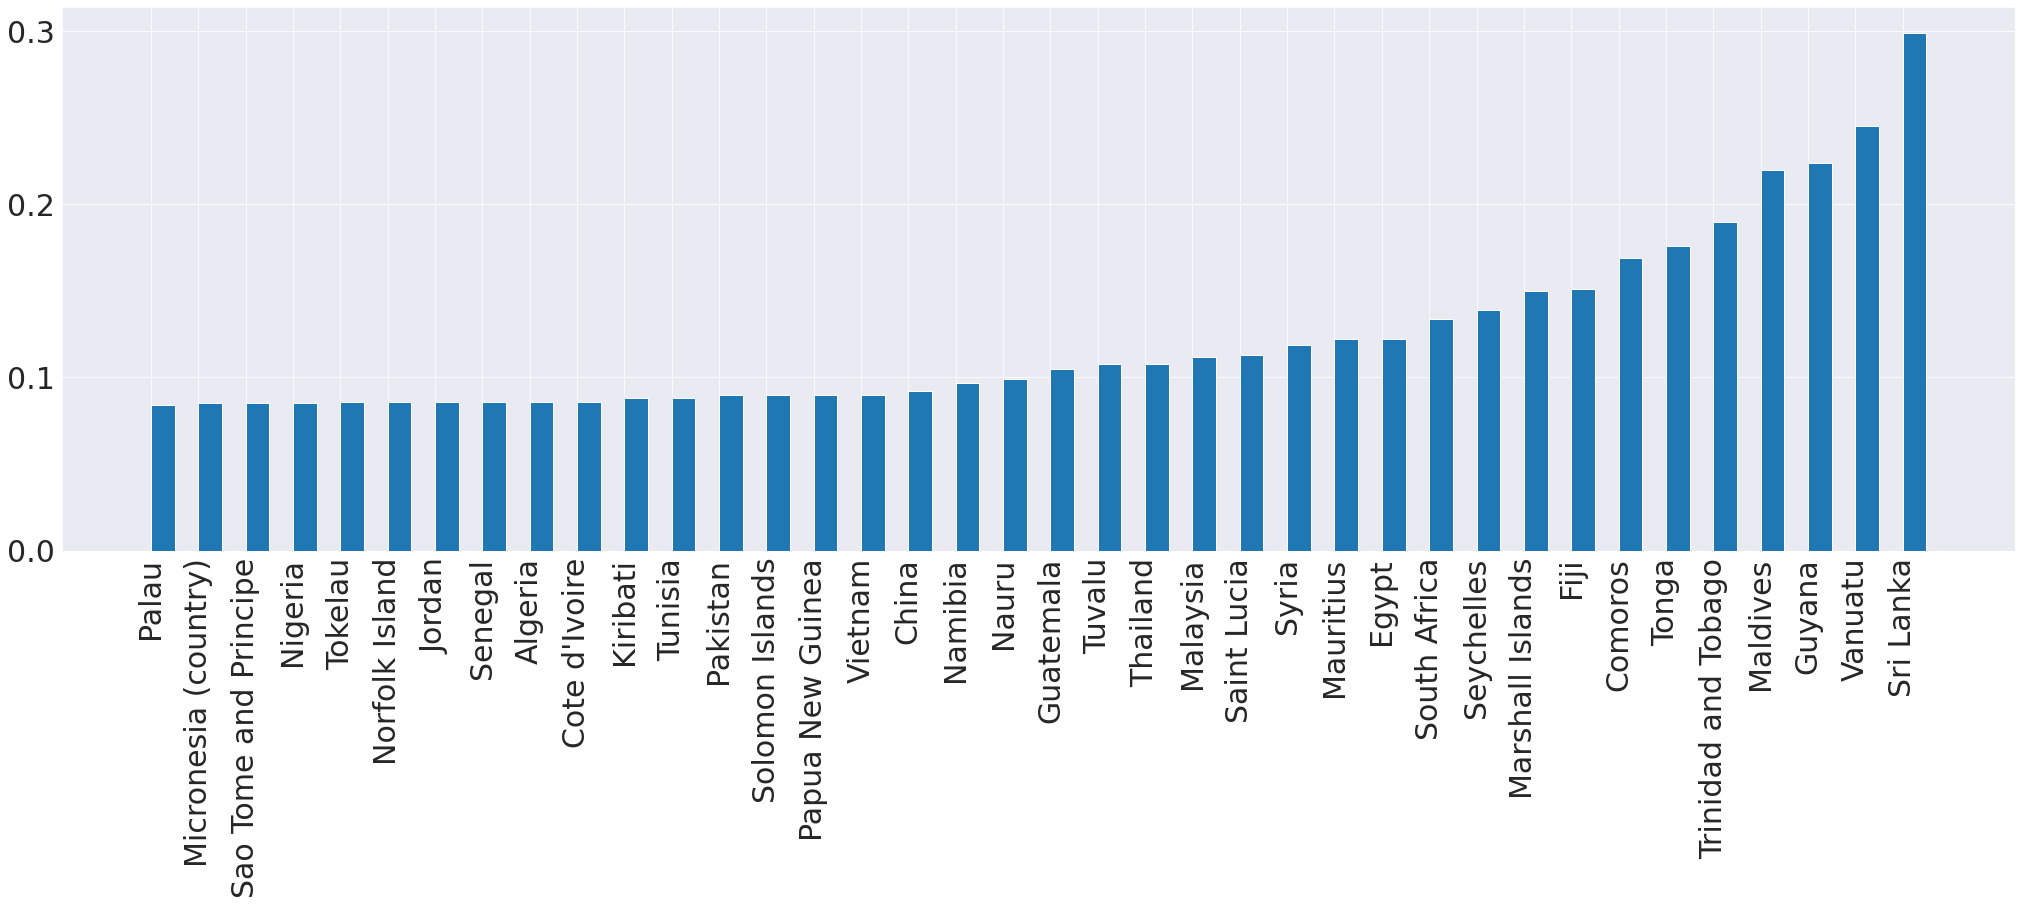

In [182]:
temp = 5
for i in range(0,temp):
#     if i > 2:
#         continue
    l = 186 #length of the dataframe
    n = temp
    ub,lb = int(i/n*l),int(((i+1)/n)*l)
    temp_df = df2_2010.iloc[ub:lb]
    x = temp_df['Entity']
    y = temp_df['PMPW']
    plt.rcParams["figure.figsize"] = (35,10) #width , height
    plt.xticks(rotation = 90,fontsize=30)
    plt.bar(x,y,align='edge', width=0.5)
    plt.yticks([0,0.1,0.2,0.3],fontsize=30)
    plt.show()

In [183]:
df2_2010.head()

,Entity,Code,Year,PMPW,PPP,Total population,Continent
0,Brunei,BRN,2010,0.001,80552.864471,389000.0,NaN
1,South Korea,KOR,2010,0.001,30352.104819,49546000.0,NaN
2,Sweden,SWE,2010,0.001,42942.562503,9390000.0,NaN
3,Denmark,DNK,2010,0.001,43998.436672,5555000.0,NaN
4,Canada,CAN,2010,0.002,40699.355129,34148000.0,NaN


In [184]:
df2_2010.to_csv('./PMPW-vs-PPP-vs-TotalPopulation-2010.csv',index=False)